In [123]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [64]:
df_crime = pd.read_csv("crime_data.csv")
df_crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [65]:
df_crime.rename(columns = {'Unnamed: 0':'Cities' }, inplace = True)
df_crime

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### 1. Hierarchical Clustering:

In [66]:
# Standardize the data:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [67]:
# (considering the numerical part of data)
df_norm = norm_func(df_crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


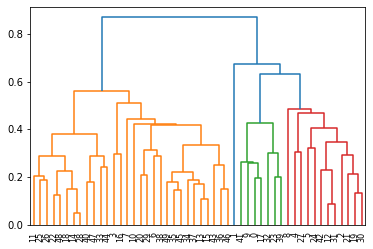

In [68]:
# creating a dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method ='average'))

In [69]:
# create clusters
hc =  AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
hc

AgglomerativeClustering(linkage='average', n_clusters=3)

In [70]:
# clusters for chart
y_hc =hc.fit_predict(df_norm)
y_hc

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [71]:
Clusters = pd.DataFrame(y_hc, columns = ['Clusters'])
Clusters

,Clusters
0,0
1,2
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [72]:
df_norm['h_clusterid'] = y_hc

In [73]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


### 2.K-means

In [74]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

C:\Users\Shubham Raut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


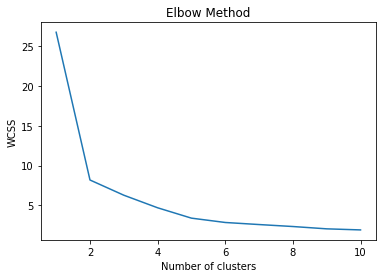

In [75]:
wcss = []
for r in range (1,11):
    kmeans = KMeans(n_clusters = r, random_state = 0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new =  KMeans (4, random_state = 42)
clusters_new.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [84]:
clusters_new.labels_

array([1, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [85]:
# Assign clusters to the data set
df_norm['clusterid_new'] = clusters_new.labels_

In [86]:
#These are standardized values.
clusters_new.cluster_centers_

array([[0.31659973, 0.32553272, 0.66666667, 0.29414298, 1.        ,
        3.        ],
       [0.69150285, 0.71863735, 0.63514719, 0.54413165, 0.        ,
        1.        ],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 , 1.        ,
        0.        ],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031, 2.        ,
        2.        ]])

In [92]:
df_norm.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,0.316600,0.325533,0.666667,0.294143,1.0
1,1,0.691503,0.718637,0.635147,0.544132,0.0
2,2,0.138052,0.106164,0.340395,0.117140,1.0
3,3,0.554217,0.746575,0.271186,0.961240,2.0


In [93]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
0,0.746988,0.654110,0.440678,0.359173,0,1
1,0.554217,0.746575,0.271186,0.961240,2,3
2,0.439759,0.852740,0.813559,0.612403,0,1
3,0.481928,0.496575,0.305085,0.315245,1,0
4,0.493976,0.791096,1.000000,0.860465,0,1
5,0.427711,0.544521,0.779661,0.811370,0,1
6,0.150602,0.222603,0.762712,0.098191,1,0
7,0.307229,0.660959,0.677966,0.219638,1,0
8,0.879518,0.993151,0.813559,0.635659,0,1
9,1.000000,0.568493,0.474576,0.478036,0,1


### 3. DBSCAN

In [94]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cities         50 non-null     object 
 1   Murder         50 non-null     float64
 2   Assault        50 non-null     int64  
 3   UrbanPop       50 non-null     int64  
 4   Rape           50 non-null     float64
 5   h_clusterid    50 non-null     int64  
 6   clusterid_new  50 non-null     int32  
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 2.7+ KB


In [97]:
df1 = df.iloc[:,1:5]
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [99]:
df1.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [101]:
stscaler = StandardScaler().fit(df1.values)
x = stscaler.transform(df1.values)

In [102]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [113]:
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [114]:
#Noisy samples given the label--> -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [138]:
cl =pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [139]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [140]:
pd.concat([df1,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [141]:
pd.concat([df_norm,cl],axis=1)

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,0.746988,0.654110,0.440678,0.359173,0,1,0
1,0.554217,0.746575,0.271186,0.961240,2,3,-1
2,0.439759,0.852740,0.813559,0.612403,0,1,0
3,0.481928,0.496575,0.305085,0.315245,1,0,0
4,0.493976,0.791096,1.000000,0.860465,0,1,0
5,0.427711,0.544521,0.779661,0.811370,0,1,0
6,0.150602,0.222603,0.762712,0.098191,1,0,0
7,0.307229,0.660959,0.677966,0.219638,1,0,0
8,0.879518,0.993151,0.813559,0.635659,0,1,0
9,1.000000,0.568493,0.474576,0.478036,0,1,0
